# Discrimination between flat regions and edges in a texture

<small>Author: Fernando Carlos López Hernández</small>

<p>This notebook shows how LBP codes discriminate between flat and edge-like regions in a textured image

In [1]:
import skimage.io
import skimage.feature
import skimage.color
import matplotlib.pyplot as plt
import numpy as np

im = skimage.io.imread('squares.jpg', as_gray = False)

We compute the LBP codes using <i>skimage</i>:

In [2]:
lbp = skimage.feature.local_binary_pattern(im, P = 8, R = 2, method = 'uniform')

Next we overlay in red the flat and edge-like pixels

In [3]:
def overlay_labels(im, lbp, labels):
    mask = np.logical_or.reduce([lbp == each for each in labels])
    return skimage.color.label2rgb(mask, image=im, bg_label=0, alpha=0.5)

flat_labels = [0,1,2,6,7,8]
flat_regions = overlay_labels(im, lbp, flat_labels)
edge_labels = [3,4,5]
edge_regions = overlay_labels(im, lbp, edge_labels)

And finally we show the result

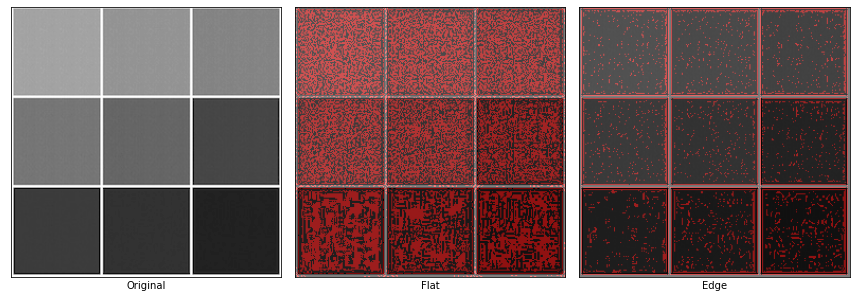

In [4]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize=[12, 6])
ax1.imshow(im, cmap = 'gray'); ax1.set_xlabel('Original')
ax2.imshow(flat_regions); ax2.set_xlabel('Flat')
ax3.imshow(edge_regions); ax3.set_xlabel('Edge')
for ax in fig.axes:
    ax.axes.xaxis.set_ticks([])
    ax.axes.yaxis.set_ticks([])
plt.tight_layout()